## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5, decay=1e-6)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 13s 65ms/step - loss: 2.1126 - accuracy: 0.2365 - val_loss: 1.9086 - val_accuracy: 0.3288
Epoch 2/500
196/196 [==============================] - 11s 58ms/step - loss: 1.8345 - accuracy: 0.3520 - val_loss: 1.8097 - val_accuracy: 0.3588
Epoch 3/500
196/196 [==============================] - 11s 58ms/step - loss: 1.7438 - accuracy: 0.3884 - val_loss: 1.6914 - val_accuracy: 0.3980
Epoch 4/500
196/196 [==============================] - 11s 58ms/step - loss: 1.6791 - accuracy: 0.4106 - val_loss: 1.6723 - val_accuracy: 0.4127
Epoch 5/500
196/196 [==============================] - 11s 58ms/step - loss: 1.6352 - accuracy: 0.4241 - val_loss: 1.6222 - val_accuracy: 0.4213
Epoch 6/500
196/196 [==============================] - 11s 58ms/step - loss: 1.6025 - accuracy: 0.4325 - val_loss: 1.6293 - val_accuracy: 0.4193
Epoch 7/500
196/196 [==============================] - 12s 60ms/step - loss: 1.5761 - accuracy: 0.4446 - val_loss: 1.6231 - val_ac

196/196 [==============================] - 11s 57ms/step - loss: 0.9526 - accuracy: 0.6676 - val_loss: 1.3914 - val_accuracy: 0.5255
Epoch 58/500
196/196 [==============================] - 11s 57ms/step - loss: 0.9220 - accuracy: 0.6753 - val_loss: 1.5451 - val_accuracy: 0.4973
Epoch 59/500
196/196 [==============================] - 11s 58ms/step - loss: 0.9390 - accuracy: 0.6774 - val_loss: 1.5427 - val_accuracy: 0.5013
Epoch 60/500
196/196 [==============================] - 11s 57ms/step - loss: 0.9155 - accuracy: 0.6795 - val_loss: 1.6008 - val_accuracy: 0.4847
Epoch 61/500
196/196 [==============================] - 11s 57ms/step - loss: 0.9219 - accuracy: 0.6789 - val_loss: 1.5102 - val_accuracy: 0.5015
Epoch 62/500
196/196 [==============================] - 11s 57ms/step - loss: 0.8971 - accuracy: 0.6873 - val_loss: 1.6020 - val_accuracy: 0.4911
Epoch 63/500
196/196 [==============================] - 11s 57ms/step - loss: 0.8915 - accuracy: 0.6890 - val_loss: 1.5082 - val_accuracy

196/196 [==============================] - 11s 56ms/step - loss: 0.4528 - accuracy: 0.8492 - val_loss: 1.9750 - val_accuracy: 0.4852
Epoch 114/500
196/196 [==============================] - 11s 56ms/step - loss: 0.4398 - accuracy: 0.8507 - val_loss: 1.8176 - val_accuracy: 0.5165
Epoch 115/500
196/196 [==============================] - 11s 56ms/step - loss: 0.4341 - accuracy: 0.8526 - val_loss: 1.8196 - val_accuracy: 0.5156
Epoch 116/500
196/196 [==============================] - 11s 56ms/step - loss: 0.4282 - accuracy: 0.8524 - val_loss: 1.9392 - val_accuracy: 0.5079
Epoch 117/500
196/196 [==============================] - 11s 57ms/step - loss: 0.4107 - accuracy: 0.8629 - val_loss: 1.8916 - val_accuracy: 0.5122
Epoch 118/500
196/196 [==============================] - 11s 56ms/step - loss: 0.4085 - accuracy: 0.8623 - val_loss: 1.8877 - val_accuracy: 0.5127
Epoch 119/500
196/196 [==============================] - 11s 57ms/step - loss: 0.3939 - accuracy: 0.8669 - val_loss: 1.9080 - val_ac

Epoch 169/500
196/196 [==============================] - 11s 56ms/step - loss: 0.6627 - accuracy: 0.8125 - val_loss: 2.4141 - val_accuracy: 0.5283
Epoch 170/500
196/196 [==============================] - 11s 56ms/step - loss: 0.1584 - accuracy: 0.9518 - val_loss: 2.4677 - val_accuracy: 0.5313
Epoch 171/500
196/196 [==============================] - 11s 56ms/step - loss: 0.1539 - accuracy: 0.9536 - val_loss: 2.4117 - val_accuracy: 0.5394
Epoch 172/500
196/196 [==============================] - 11s 56ms/step - loss: 0.1204 - accuracy: 0.9666 - val_loss: 2.4307 - val_accuracy: 0.5299
Epoch 173/500
196/196 [==============================] - 11s 57ms/step - loss: 0.1097 - accuracy: 0.9722 - val_loss: 2.5609 - val_accuracy: 0.5286
Epoch 174/500
196/196 [==============================] - 11s 57ms/step - loss: 0.1190 - accuracy: 0.9668 - val_loss: 2.6522 - val_accuracy: 0.5187
Epoch 175/500
196/196 [==============================] - 11s 57ms/step - loss: 0.1407 - accuracy: 0.9590 - val_loss: 2

Epoch 225/500
196/196 [==============================] - 11s 57ms/step - loss: 0.0218 - accuracy: 0.9983 - val_loss: 2.9827 - val_accuracy: 0.5416
Epoch 226/500
196/196 [==============================] - 11s 56ms/step - loss: 0.0193 - accuracy: 0.9980 - val_loss: 2.9854 - val_accuracy: 0.5426
Epoch 227/500
196/196 [==============================] - 11s 56ms/step - loss: 0.0172 - accuracy: 0.9991 - val_loss: 2.9837 - val_accuracy: 0.5416
Epoch 228/500
196/196 [==============================] - 11s 57ms/step - loss: 0.0161 - accuracy: 0.9989 - val_loss: 3.3051 - val_accuracy: 0.5118
Epoch 229/500
196/196 [==============================] - 11s 56ms/step - loss: 0.0278 - accuracy: 0.9956 - val_loss: 3.0317 - val_accuracy: 0.5411
Epoch 230/500
196/196 [==============================] - 11s 57ms/step - loss: 0.0169 - accuracy: 0.9990 - val_loss: 3.0461 - val_accuracy: 0.5401
Epoch 231/500
196/196 [==============================] - 11s 57ms/step - loss: 0.0164 - accuracy: 0.9985 - val_loss: 3

Epoch 281/500
196/196 [==============================] - 11s 57ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 3.4231 - val_accuracy: 0.5401
Epoch 282/500
196/196 [==============================] - 11s 58ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 3.4265 - val_accuracy: 0.5399
Epoch 283/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 3.4307 - val_accuracy: 0.5400
Epoch 284/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 3.4415 - val_accuracy: 0.5430
Epoch 285/500
196/196 [==============================] - 12s 60ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 3.4442 - val_accuracy: 0.5420
Epoch 286/500
196/196 [==============================] - 13s 64ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 3.4539 - val_accuracy: 0.5417
Epoch 287/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 3

196/196 [==============================] - 11s 59ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 3.6643 - val_accuracy: 0.5424
Epoch 337/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.6621 - val_accuracy: 0.5401
Epoch 338/500
196/196 [==============================] - 11s 59ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 3.6746 - val_accuracy: 0.5409
Epoch 339/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 3.6726 - val_accuracy: 0.5415
Epoch 340/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 3.6866 - val_accuracy: 0.5419
Epoch 341/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.6859 - val_accuracy: 0.5402
Epoch 342/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 3.6830 - val_ac

Epoch 392/500
196/196 [==============================] - 11s 58ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.8330 - val_accuracy: 0.5394
Epoch 393/500
196/196 [==============================] - 11s 58ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.8382 - val_accuracy: 0.5393
Epoch 394/500
196/196 [==============================] - 11s 59ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.8419 - val_accuracy: 0.5395
Epoch 395/500
196/196 [==============================] - 11s 58ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.8443 - val_accuracy: 0.5392
Epoch 396/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.8472 - val_accuracy: 0.5395
Epoch 397/500
196/196 [==============================] - 11s 59ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.8467 - val_accuracy: 0.5408
Epoch 398/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3

196/196 [==============================] - 12s 61ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.9623 - val_accuracy: 0.5399
Epoch 448/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.9631 - val_accuracy: 0.5384
Epoch 449/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.9666 - val_accuracy: 0.5391
Epoch 450/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.9664 - val_accuracy: 0.5382
Epoch 451/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.9708 - val_accuracy: 0.5394
Epoch 452/500
196/196 [==============================] - 12s 60ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.9675 - val_accuracy: 0.5379
Epoch 453/500
196/196 [==============================] - 12s 59ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.9756 - val_ac

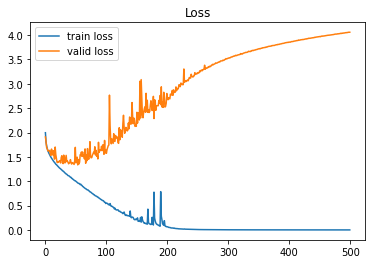

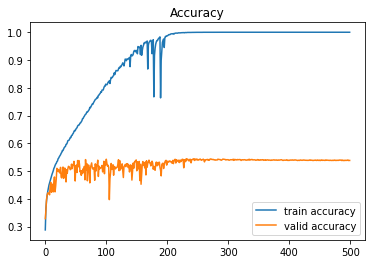

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()